### Importing libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Uploading of File

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving customer_segmentation.csv to customer_segmentation (2).csv


###Load the Dataset

In [ ]:
df=pd.read_csv('customer_segmentation.csv',encoding='latin1')

In [ ]:
print("Number of 5 Rows:")
print(df.head())
print("\nSummary: ")
print(df.info)
print("\nStatistics: ")
print(df.describe())
print("\nMissing values: ")
print(df.isnull().sum())
print("\nDropping rows with missing values: ")
print(df.dropna())
print("\nColumns: ")
print(df.columns)

Number of 5 Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Summary: 
<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  

###Feature Selection

In [ ]:
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    df['InvoiceMonth'] = df['InvoiceDate'].dt.month
    df['InvoiceYear'] = df['InvoiceDate'].dt.year

In [ ]:
print("\nSelecting numeric columns only...\n")
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.columns)


Selecting numeric columns only...

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceMonth', 'InvoiceYear'], dtype='object')


In [ ]:
features = ['Quantity', 'InvoiceMonth', 'InvoiceYear']
target = 'UnitPrice'

X = df[features]
y = df[target]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

###Train & Evaluate

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))


Linear Regression:
Mean Squared Error: 7260.303454309511
R² Score: 3.250667768384119e-05

Ridge Regression:
Mean Squared Error: 7260.303453938839
R² Score: 3.250672873678084e-05

Lasso Regression:
Mean Squared Error: 7260.27339592491
R² Score: 3.664664341562762e-05


###For Better Visualization

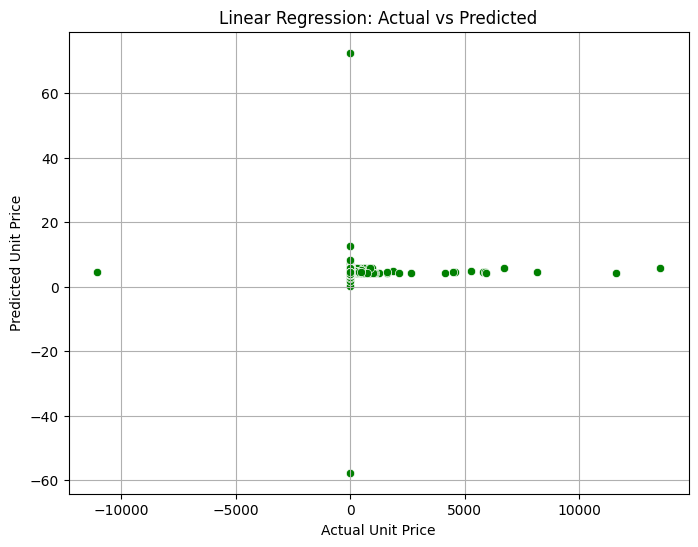

In [ ]:
linear_model = models["Linear Regression"]
y_pred_linear = linear_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='green')
plt.xlabel("Actual Unit Price")
plt.ylabel("Predicted Unit Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()